<a href="https://colab.research.google.com/github/pbeles/pbeles-NLP_project_j/blob/main/3_different_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Naive Bayes Test Predictions: [1 1 1 ... 0 0 1]
Logistic Regression Test Predictions: [1 1 1 ... 0 0 1]
SVM Test Predictions: [1 1 1 ... 0 0 1]


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/2
1708/1708 [==============================] - 416s 218ms/step - loss: 0.0958 - accuracy: 0.9655
Epoch 2/2
427/427 [==============================] - 36s 78ms/step - loss: 0.0739 - accuracy: 0.9811
BERT Accuracy: 0.9811155200004578
427/427 [==============================] - 35s 75ms/step
BERT F1 Score: 0.9811150328565579
BERT Precision Score: 0.9811156153658477
BERT Test Predictions: [1 1 1 ... 0 0 1]


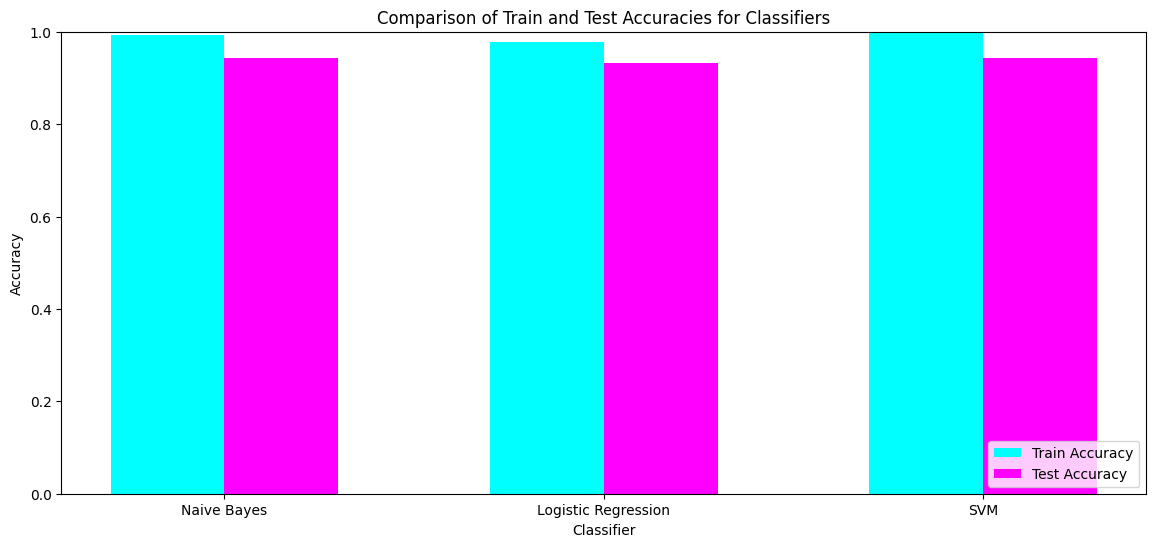

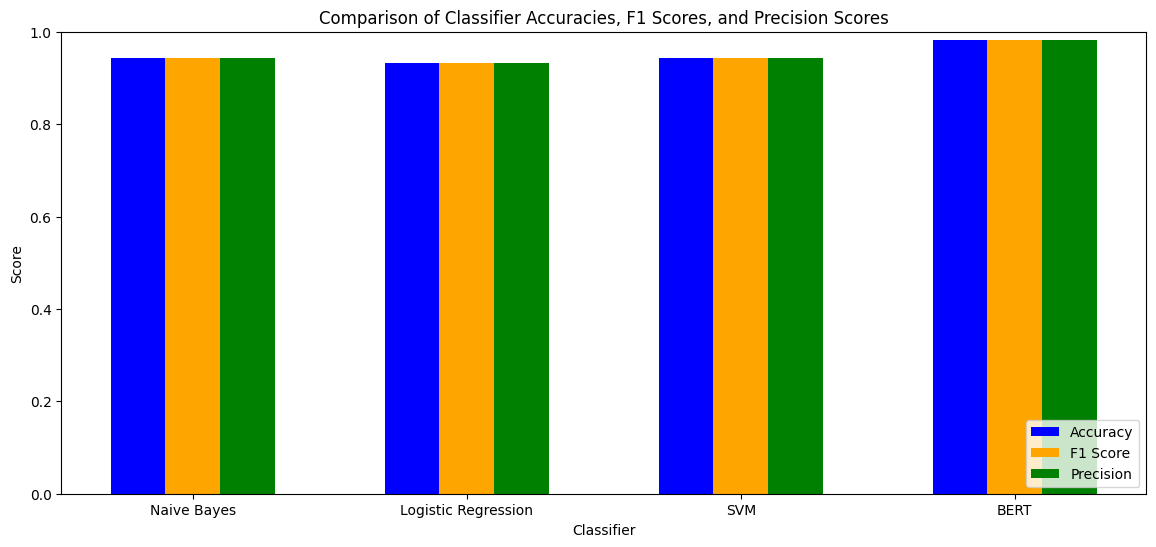

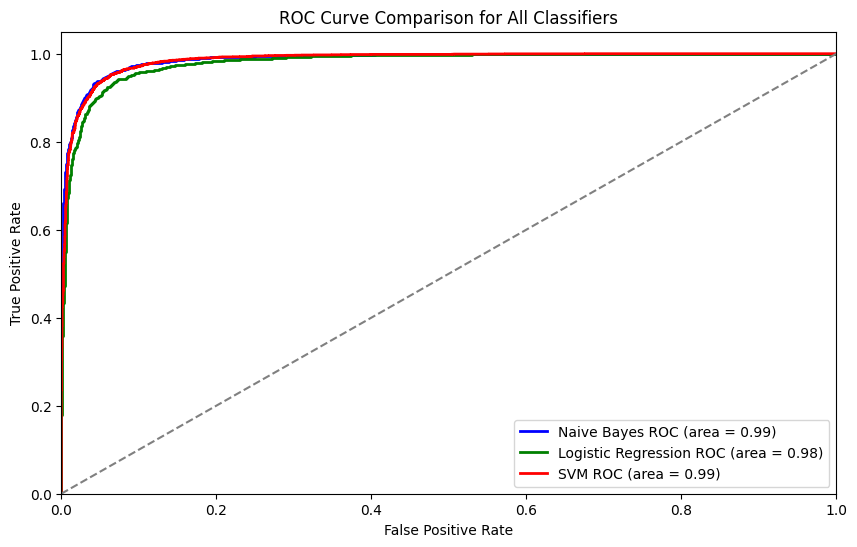

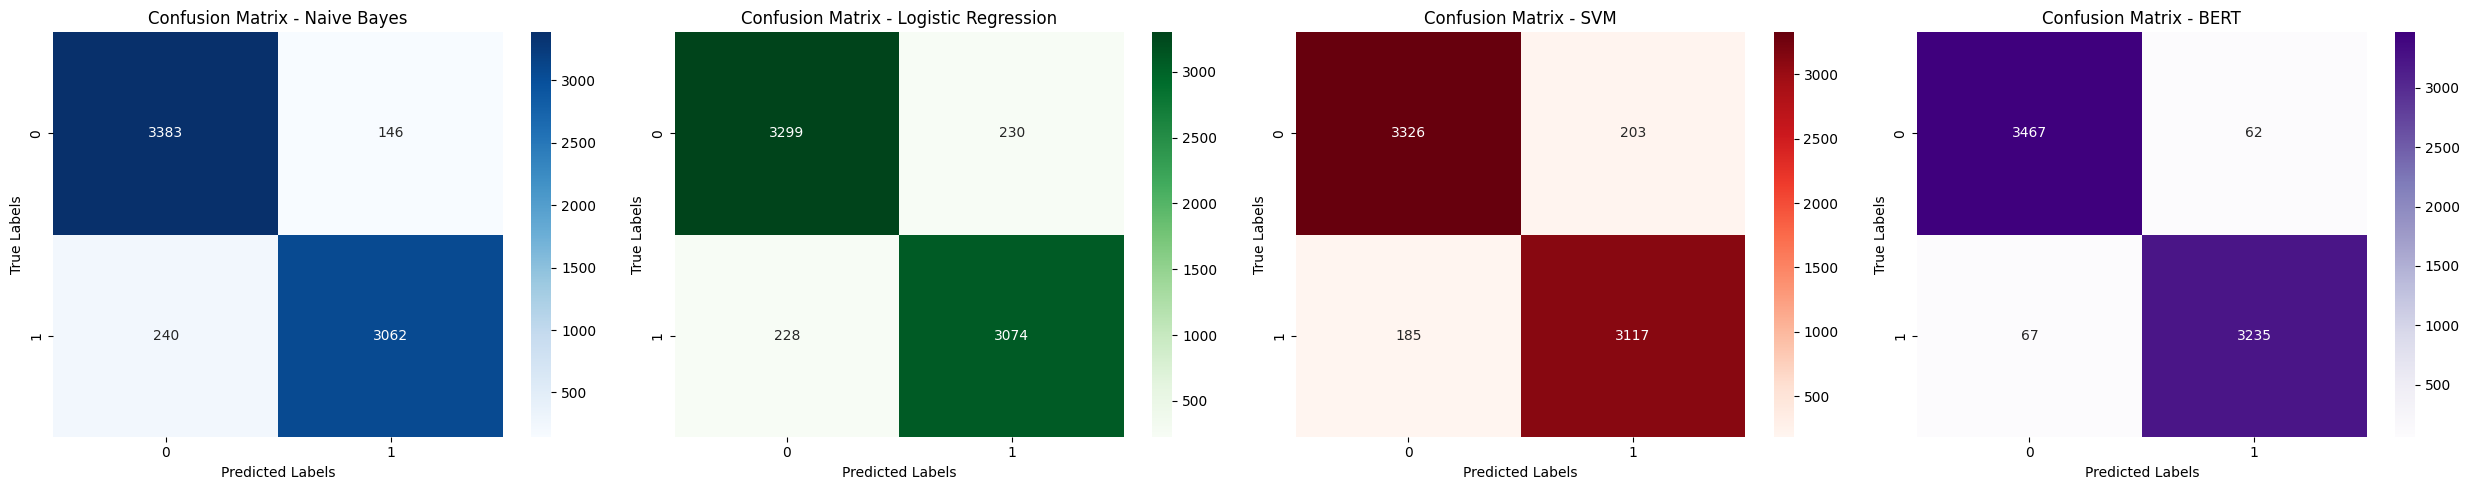

In [2]:
import pandas as pd
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
import numpy as np

#Load dataset

file_path = '/content/training_data_lowercase.csv'
data = pd.read_csv(file_path, delimiter='\t', header=None, names=['label', 'text'])

#Train-test split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

#Data Preprocessing

def preprocess_text(text):
# Remove HTML tags
  text = re.sub(r'<.*?>', '', text)
# Remove punctuation
  text = text.translate(str.maketrans('', '', string.punctuation))
# Remove numbers
  text = re.sub(r'\d+', '', text)
# Remove single characters
  text = re.sub(r'\b[a-zA-Z]\b', '', text)
# Substitute multiple spaces with single space
  text = re.sub(r'\s+', ' ', text)
# Convert to lowercase
  text = text.lower()
  return text

#Define stopwords using NLTK

def define_stopwords():
  nltk.download('stopwords')
  from nltk.corpus import stopwords
  return set(stopwords.words('english'))

stop_words = define_stopwords()

#Remove stopwords function

def remove_stopwords(text):
  return ' '.join([word for word in text.split() if word not in stop_words])

#Lemmatize text (placeholder function)

def lemmatize_text(text):
  return ' '.join([word for word in text.split()])  # This will keep the words unchanged

#Apply preprocessing, stopword removal, and lemmatization

train_data['processed_text'] = train_data['text'].apply(preprocess_text)
test_data['processed_text'] = test_data['text'].apply(preprocess_text)

train_data['processed_text'] = train_data['processed_text'].apply(remove_stopwords)
test_data['processed_text'] = test_data['processed_text'].apply(remove_stopwords)

train_data['processed_text'] = train_data['processed_text'].apply(lemmatize_text)
test_data['processed_text'] = test_data['processed_text'].apply(lemmatize_text)

#Feature Representation - TF-IDF Vectorizer with n-grams

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['processed_text'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['processed_text'])

#Train the classifiers

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, train_data['label'])

lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_tfidf, train_data['label'])

svm_classifier = SVC(probability=True)
svm_classifier.fit(X_train_tfidf, train_data['label'])

#Train Accuracy Calculation

y_train_pred_nb = nb_classifier.predict(X_train_tfidf)
y_train_pred_lr = lr_classifier.predict(X_train_tfidf)
y_train_pred_svm = svm_classifier.predict(X_train_tfidf)

#Train Accuracy Scores

nb_train_accuracy = accuracy_score(train_data['label'], y_train_pred_nb)
lr_train_accuracy = accuracy_score(train_data['label'], y_train_pred_lr)
svm_train_accuracy = accuracy_score(train_data['label'], y_train_pred_svm)

#Test Accuracy Calculation (already present in the original code)

y_pred_nb = nb_classifier.predict(X_test_tfidf)
y_pred_lr = lr_classifier.predict(X_test_tfidf)
y_pred_svm = svm_classifier.predict(X_test_tfidf)

#Test Accuracy Scores

nb_test_accuracy = accuracy_score(test_data['label'], y_pred_nb)
lr_test_accuracy = accuracy_score(test_data['label'], y_pred_lr)
svm_test_accuracy = accuracy_score(test_data['label'], y_pred_svm)

#Print Expected Predictions for Test Data

print("Naive Bayes Test Predictions:", y_pred_nb)
print("Logistic Regression Test Predictions:", y_pred_lr)
print("SVM Test Predictions:", y_pred_svm)

#F1 Scores

nb_f1 = f1_score(test_data['label'], y_pred_nb, average='weighted')
lr_f1 = f1_score(test_data['label'], y_pred_lr, average='weighted')
svm_f1 = f1_score(test_data['label'], y_pred_svm, average='weighted')

#Precision Scores

nb_precision = precision_score(test_data['label'], y_pred_nb, average='weighted')
lr_precision = precision_score(test_data['label'], y_pred_lr, average='weighted')
svm_precision = precision_score(test_data['label'], y_pred_svm, average='weighted')

#BERT Classifier

bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

#Tokenizing the text for BERT

train_encodings = bert_tokenizer(list(train_data['text']), truncation=True, padding=True, max_length=128)
test_encodings = bert_tokenizer(list(test_data['text']), truncation=True, padding=True, max_length=128)

train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_data['label'])).batch(16)
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), test_data['label'])).batch(16)

#Compile and train BERT model

bert_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
bert_model.fit(train_dataset, epochs=2, batch_size=16)

#Evaluate BERT model

bert_eval = bert_model.evaluate(test_dataset)
bert_accuracy = bert_eval[1]
print("BERT Accuracy:", bert_accuracy)

#Predict using BERT

bert_predictions = bert_model.predict(test_dataset).logits
y_pred_bert = tf.argmax(bert_predictions, axis=1).numpy()
bert_f1 = f1_score(test_data['label'], y_pred_bert, average='weighted')
bert_precision = precision_score(test_data['label'], y_pred_bert, average='weighted')
print("BERT F1 Score:", bert_f1)
print("BERT Precision Score:", bert_precision)
print("BERT Test Predictions:", y_pred_bert)

#Combined Bar Plot for Train vs Test Accuracy

plt.figure(figsize=(14, 6))
indices = np.arange(3)
width = 0.3

train_accuracies = [nb_train_accuracy, lr_train_accuracy, svm_train_accuracy]
test_accuracies = [nb_test_accuracy, lr_test_accuracy, svm_test_accuracy]
classifiers = ['Naive Bayes', 'Logistic Regression', 'SVM']

plt.bar(indices - width/2, train_accuracies, width, color='cyan', label='Train Accuracy')
plt.bar(indices + width/2, test_accuracies, width, color='magenta', label='Test Accuracy')

plt.ylim(0, 1)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Train and Test Accuracies for Classifiers')
plt.xticks(indices, classifiers)
plt.legend(loc='lower right')
plt.show()

#Combined Bar Plot for Classifier Accuracy, F1 Scores, and Precision

plt.figure(figsize=(14, 6))
indices = np.arange(4)
width = 0.2

accuracies = [nb_test_accuracy, lr_test_accuracy, svm_test_accuracy, bert_accuracy]
f1_scores = [nb_f1, lr_f1, svm_f1, bert_f1]
precision_scores = [nb_precision, lr_precision, svm_precision, bert_precision]
classifiers = ['Naive Bayes', 'Logistic Regression', 'SVM', 'BERT']

plt.bar(indices - width, accuracies, width, color='blue', label='Accuracy')
plt.bar(indices, f1_scores, width, color='orange', label='F1 Score')
plt.bar(indices + width, precision_scores, width, color='green', label='Precision')

plt.ylim(0, 1)
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.title('Comparison of Classifier Accuracies, F1 Scores, and Precision Scores')
plt.xticks(indices, classifiers)
plt.legend(loc='lower right')
plt.show()

#Plotting ROC Curve comparison for all classifiers

plt.figure(figsize=(10, 6))

#Naive Bayes ROC

y_prob_nb = nb_classifier.predict_proba(X_test_tfidf)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(test_data['label'], y_prob_nb, pos_label=nb_classifier.classes_[1])
roc_auc_nb = roc_auc_score(test_data['label'], y_prob_nb)
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label=f'Naive Bayes ROC (area = {roc_auc_nb:.2f})')

#Logistic Regression ROC

y_prob_lr = lr_classifier.predict_proba(X_test_tfidf)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(test_data['label'], y_prob_lr)
roc_auc_lr = roc_auc_score(test_data['label'], y_prob_lr)
plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label=f'Logistic Regression ROC (area = {roc_auc_lr:.2f})')

#SVM ROC

y_prob_svm = svm_classifier.predict_proba(X_test_tfidf)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(test_data['label'], y_prob_svm)
roc_auc_svm = roc_auc_score(test_data['label'], y_prob_svm)
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM ROC (area = {roc_auc_svm:.2f})')

#Plot Settings

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for All Classifiers')
plt.legend(loc='lower right')
plt.show()

#Plotting Confusion Matrices for all classifiers

fig, axes = plt.subplots(1, 4, figsize=(25, 5))

#Confusion Matrix for Naive Bayes

conf_matrix_nb = confusion_matrix(test_data['label'], y_pred_nb)
sns.heatmap(conf_matrix_nb, annot=True, cmap='Blues', fmt='g', ax=axes[0])
axes[0].set_title('Confusion Matrix - Naive Bayes')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

#Confusion Matrix for Logistic Regression

conf_matrix_lr = confusion_matrix(test_data['label'], y_pred_lr)
sns.heatmap(conf_matrix_lr, annot=True, cmap='Greens', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix - Logistic Regression')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

#Confusion Matrix for SVM

conf_matrix_svm = confusion_matrix(test_data['label'], y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, cmap='Reds', fmt='g', ax=axes[2])
axes[2].set_title('Confusion Matrix - SVM')
axes[2].set_xlabel('Predicted Labels')
axes[2].set_ylabel('True Labels')

#Confusion Matrix for BERT

conf_matrix_bert = confusion_matrix(test_data['label'], y_pred_bert)
sns.heatmap(conf_matrix_bert, annot=True, cmap='Purples', fmt='g', ax=axes[3])
axes[3].set_title('Confusion Matrix - BERT')
axes[3].set_xlabel('Predicted Labels')
axes[3].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

